Intensity vs Fermi Chopper frequency

Just try the original parameters

In [1]:
cd ~/dv/sns-chops/resolution/CNCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/PyChop


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [3]:
from mcni.utils import conversion as C

In [4]:
%matplotlib notebook

# Exp data

In [5]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [6]:
expdata_highres = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighRes.dat'))
expdata_interm = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_Intermediate.dat'))
expdata_highflux = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighFlux.dat'))

reading data. please wait...
  done
reading data. please wait...
  done
reading data. please wait...
  done


<IPython.core.display.Javascript object>


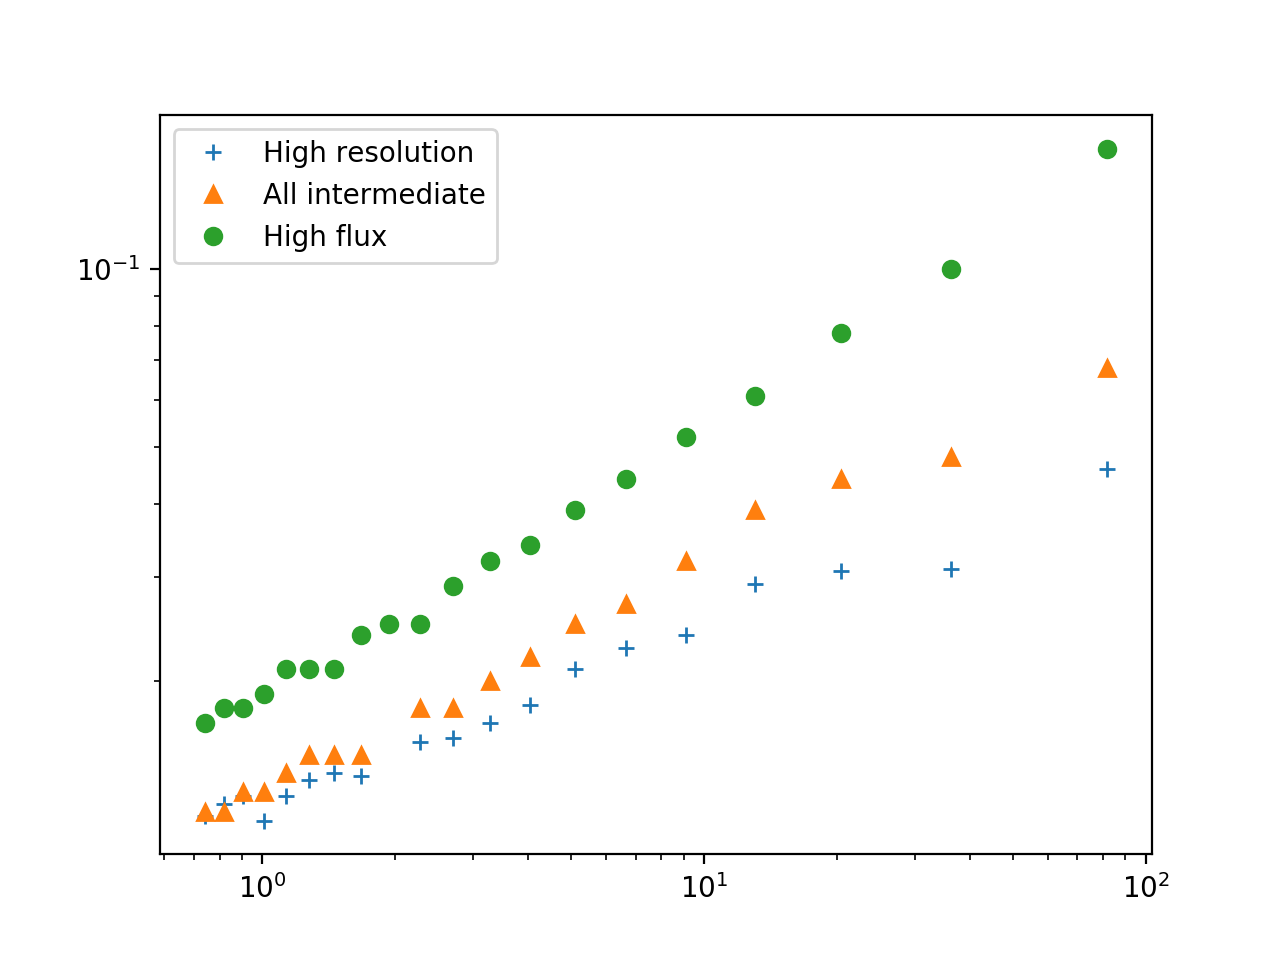

In [7]:
plt.figure()
plt.loglog(expdata_highres.Ei_list, expdata_highres.FWHM/np.array(expdata_highres.Ei_list), 
             '+', label='High resolution')
plt.loglog( expdata_interm.Ei_list, expdata_interm.FWHM/np.array(expdata_interm.Ei_list),
             '^', label='All intermediate')
plt.loglog(expdata_highflux.Ei_list, expdata_highflux.FWHM/np.array(expdata_highflux.Ei_list),
             'o', label='High flux')
plt.legend()

In [13]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

# PyChop

In [8]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [9]:
from PyChop import PyChop2

In [10]:
import PyChop

In [11]:
instrument = PyChop2('./cncs-no-mod-contrib.yaml')

<IPython.core.display.Javascript object>


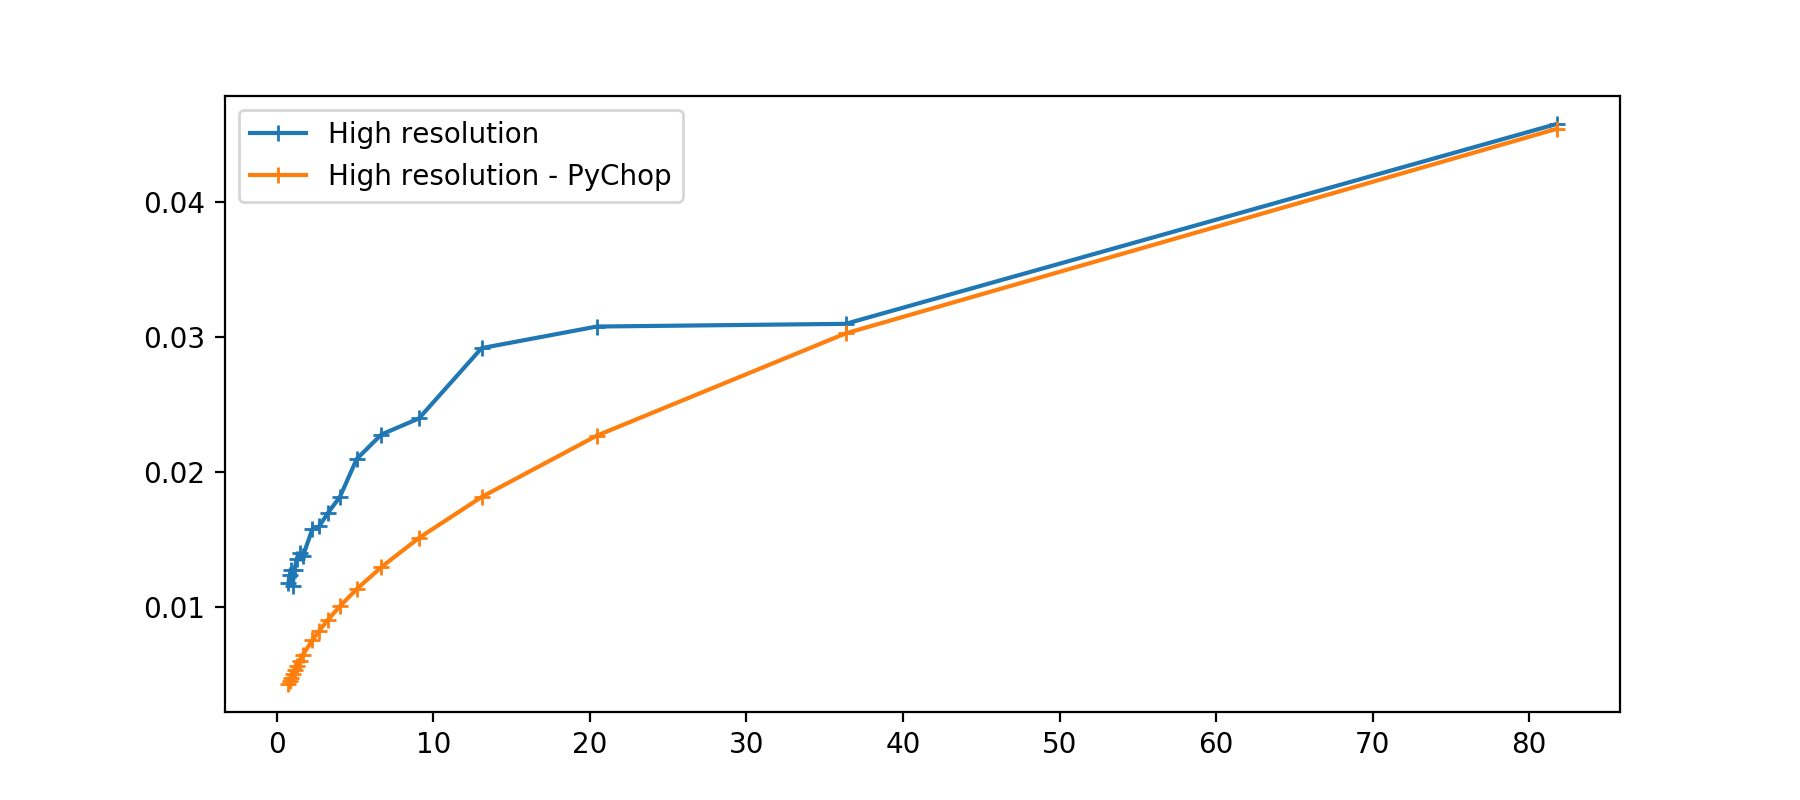

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9,4))

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
# ax.loglog(x,y, '+-', label='High resolution')
ax.plot(x, y/x, '+-', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
# ax.loglog(x,y_pychop, '+-', label='High resolution - PyChop')
ax.plot(x, y_pychop/x, '+-', label='High resolution - PyChop')
ax.legend()


# Calculate FHWM(E)

<IPython.core.display.Javascript object>


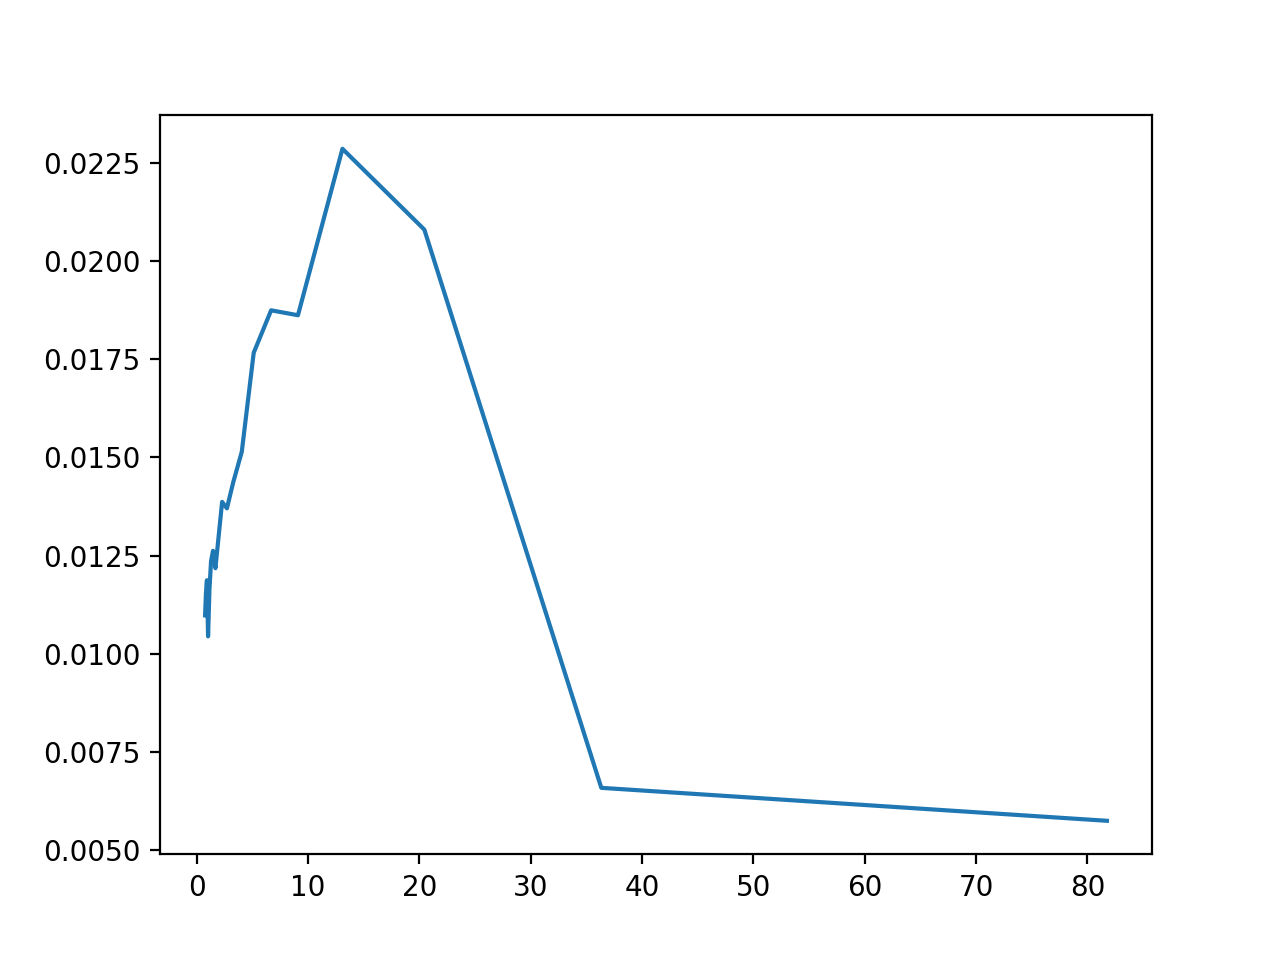

In [21]:
y_pychop = np.array(y_pychop)
mod_dE = np.sqrt(-y_pychop**2 + y**2)
mod_dE_over_E = mod_dE/x

plt.figure()
plt.plot(x,mod_dE_over_E)

In [22]:
from mcni.utils import conversion

In [19]:
L1 = 34.784
L2 = 36.252-34.784
L3 = 3.5

In [23]:
vi = conversion.e2v(x)

In [25]:
mod_dvf_over_vf = mod_dE_over_E / 2.
mod_fwhm = mod_dvf_over_vf*(L3/vi) *(L1/(L2+L3))

In [29]:
Es, fwhms = np.loadtxt('../mcvine/beam-fwhms.txt').T

In [33]:
from scipy.signal import savgol_filter

<IPython.core.display.Javascript object>


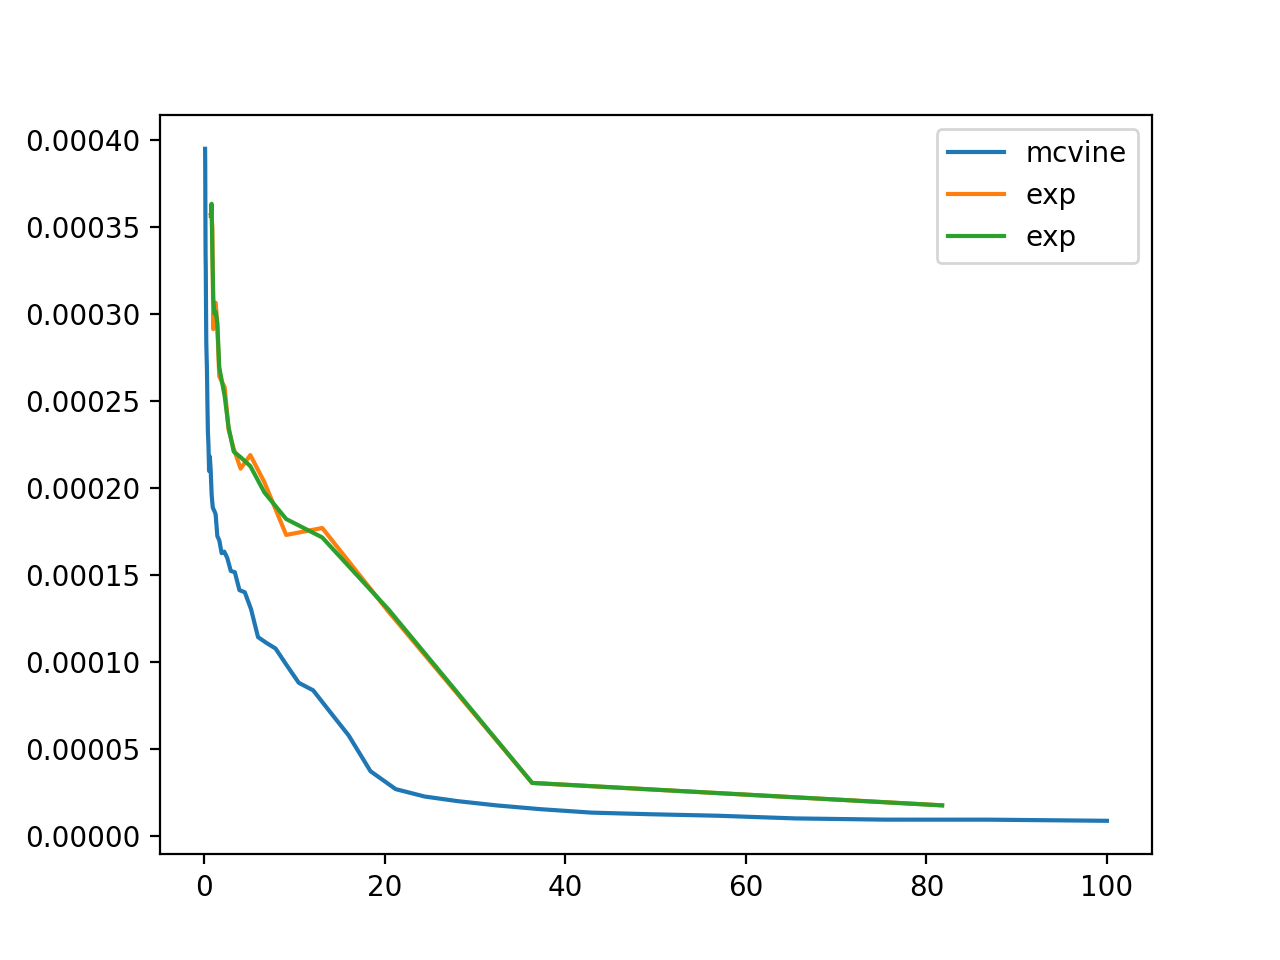

In [49]:
plt.figure()
plt.plot(Es, fwhms, label='mcvine')
plt.plot(x, mod_fwhm, label='exp')
plt.plot(x, savgol_filter(mod_fwhm,11, 7), label='exp')
plt.legend()

In [ ]:
savgol_filter()

In [43]:
x

array([ 0.74145234,  0.8174512 ,  0.9057631 ,  1.00919901,  1.13142035,
        1.2772675 ,  1.45324658,  1.66826776,  2.27069778,  2.70231802,
        3.2698048 ,  4.03679605,  5.10907   ,  6.67307102,  9.08279111,
       13.0792192 , 20.43628   , 36.33116444, 81.74512   ])

In [56]:
savgol_filter(mod_fwhm,11, 7)*1e6

array([356.25930817, 363.18764374, 334.81800486, 308.62905   ,
       300.08850676, 301.066175  , 294.90141637, 269.3638043 ,
       252.64844475, 234.85452697, 220.91443687, 217.65514851,
       212.57653579, 197.40164613, 182.18407287, 171.59643039,
       130.15077412,  30.68849917,  17.75302096])

pychop yaml file needs wavelength

In [55]:
2*np.pi/conversion.e2k(x)

array([10.50378671, 10.00360639,  9.50342607,  9.00324575,  8.50306543,
        8.00288511,  7.50270479,  7.00252447,  6.00216383,  5.50198351,
        5.00180319,  4.50162288,  4.00144256,  3.50126224,  3.00108192,
        2.5009016 ,  2.00072128,  1.50054096,  1.00036064])